<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
# Imports
import pandas as pd

import spacy
from spacy.tokenizer import Tokenizer
import re

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [2]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [4]:
# load spacy dict
nlp = spacy.load("en_core_web_lg")

In [6]:
# tokenize function
def tokenize(doc):
    doc = nlp(doc)
    
    tokens = [token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True) and (token.text != " ")]
    
    return tokens

# might be useful
def retoken(doc):
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', doc)
    tokens = tokens.lower().split()
    tokens = str(tokens)
    
    return tokens

In [7]:
test = "This is a test for the sprint challenge !"

In [8]:
tokenize(test)

['test', 'sprint', 'challenge']

In [9]:
%%time
# Assuming we need to tokenize yelp['text']
yelp['tokens'] = yelp['text'].apply(tokenize)

CPU times: user 2min 13s, sys: 125 ms, total: 2min 13s
Wall time: 2min 14s


In [11]:
yelp['text'].head(10)

0    BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...
1    Came here for lunch Togo. Service was quick. S...
2    I've been to Vegas dozens of times and had nev...
3    We went here on a night where they closed off ...
4    3.5 to 4 stars\n\nNot bad for the price, $12.9...
5    Tasty, fast casual Latin street food.  The men...
6    This show is absolutely amazing!! What an incr...
7    Came for the Pho and really enjoyed it!  We go...
8    Absolutely the most Unique experience in a nai...
9    Wow. I walked in and sat at the bar for 10 min...
Name: text, dtype: object

In [12]:
yelp['tokens'] = yelp['text'].apply(retoken)
yelp['text'].head(10)

0    BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...
1    Came here for lunch Togo. Service was quick. S...
2    I've been to Vegas dozens of times and had nev...
3    We went here on a night where they closed off ...
4    3.5 to 4 stars\n\nNot bad for the price, $12.9...
5    Tasty, fast casual Latin street food.  The men...
6    This show is absolutely amazing!! What an incr...
7    Came for the Pho and really enjoyed it!  We go...
8    Absolutely the most Unique experience in a nai...
9    Wow. I walked in and sat at the bar for 10 min...
Name: text, dtype: object

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [14]:
vect = CountVectorizer()
vect.fit(yelp['tokens'])
dtm = vect.transform(yelp['tokens'])

In [15]:
dtm_to_df = pd.DataFrame(dtm.todense(), columns = vect.get_feature_names())
dtm_to_df.head()

,001695do,001695howard,007,011802,0227,025,035lbs,04,04162016,05,...,zuma,zumanity,zumba,zuni,zupas,zuzana,zuzu,zyrtec,zzaplon,zzzzzzzzzmy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# tfidf vecorizer
tfidf = TfidfVectorizer(tokenizer=tokenize, min_df=0.025, max_df=.98, ngram_range=(1,3))
dtm = tfidf.fit_transform(yelp['tokens'])
dtm = pd.DataFrame(dtm.todense(), columns = tfidf.get_feature_names())

In [17]:
%%time
# nn model
nn = NearestNeighbors(n_neighbors = 5, algorithm = 'ball_tree')
nn.fit(dtm)

CPU times: user 328 ms, sys: 0 ns, total: 328 ms
Wall time: 344 ms


NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [18]:
nn.kneighbors([dtm.iloc[10]])

(array([[0.        , 0.8685944 , 0.94301857, 0.94637062, 0.95624402]]),
 array([[  10, 5531, 9086, 8348, 5741]]))

In [19]:
yelp['tokens'][5531][:300]

"['pizza', 'is', 'a', 'staple', 'for', 'me', 'i', 'love', 'everything', 'about', 'crunch', 'crust', 'a', 'nice', 'rich', 'tomato', 'sauce', 'and', 'a', 'thick', 'layer', 'of', 'melted', 'cheese', 'i', 'have', 'never', 'tried', 'chicago', 'style', 'pizza', 'before', 'and', 'when', 'we', 'had', 'to', '"

In [20]:
yelp['tokens'][9086][:300]

"['i', 'can', 'not', 'explain', 'how', 'amazing', 'the', 'food', 'is', 'here', 'the', 'topping', 'to', 'actual', 'pizza', 'ratio', 'is', 'perfect', 'from', 'the', 'pizza', 'sauce', 'to', 'the', 'crust', 'of', 'the', 'pizza', 'and', 'not', 'to', 'mention', 'the', 'toppings', 'all', 'taste', 'so', 'goo"

In [21]:
fake_review = ["The pizza was great, me and my wife had to wait a while to be seated though, but no wonder given how popular this place has been lately."]

In [22]:
new = tfidf.transform(fake_review)
nn.kneighbors(new.todense())

(array([[0.98199298, 0.98786683, 0.98914459, 1.        , 1.        ]]),
 array([[8165, 5582, 2171, 4839, 3469]]))

In [27]:
# compare
print(fake_review)
print(yelp['tokens'][8165][:300])
print(yelp['tokens'][4839][:300])
print(yelp['tokens'][5582][:300])

['The pizza was great, me and my wife had to wait a while to be seated though, but no wonder given how popular this place has been lately.']
['livraison', 'rapidebonne', 'pizza', 'et', 'poutinepas', 'les', 'meilleurs', 'mais', 'bon', 'pas', 'chre', 'et', 'rapide', 'surtout', 'dans', 'le', 'coins']
['une', 'superbe', 'slection', 'de', 'bires', 'de', 'microbrasserie', 'qubcoise', 'avec', 'slection', 'de', 'fromages', 'et', 'charcuteries', 'le', 'personnel', 'est', 'trs', 'sympathique', 'la', 'slection', 'de', 'bires', 'evolue', 'constamment', 'bravo', 'lquipe']
['i', 'seriously', 'dont', 'understand', 'what', 'is', 'all', 'the', 'hype', 'about', 'this', 'place', 'i', 'love', 'my', 'thin', 'crust', 'pizza', 'but', 'i', 'actually', 'love', 'it', 'with', 'good', 'flavourful', 'toppings', 'and', 'unburn', 'crust', 'which', 'libretto', 'cant', 'seems', 'to', 'b


## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [29]:
%%time
vect = TfidfVectorizer(stop_words = 'english')
rf = RandomForestClassifier()

pipe = Pipeline([('vect',vect),('rf',rf)])

parameters = {
    'vect__max_df': ( 0.75, 1.0),        
    'vect__min_df': (.02, .06),          
    'vect__max_features': (1000,5000),
    'rf__n_estimators':(5, 100,),
    'rf__max_depth':(15,30)
}

gscv = GridSearchCV(pipe, parameters, cv = 6, n_jobs = -1, verbose = 1)
gscv.fit(yelp['tokens'], yelp['stars'])

Fitting 6 folds for each of 32 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:  1.3min finished


CPU times: user 5.59 s, sys: 2.05 s, total: 7.64 s
Wall time: 1min 24s


GridSearchCV(cv=6, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [30]:
gscv.best_params_

{'rf__max_depth': 30,
 'rf__n_estimators': 100,
 'vect__max_df': 1.0,
 'vect__max_features': 5000,
 'vect__min_df': 0.02}

In [31]:
gscv.best_score_

0.5687992053450055

In [32]:
# make prediction
pred = gscv.predict(yelp['tokens'])

In [33]:
prediction = pd.DataFrame({'desc': yelp['text'], 'rate':pred})
prediction['rate'] = prediction['rate'].astype('int64')
prediction.head(10)

,desc,rate
0,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",1
1,Came here for lunch Togo. Service was quick. S...,4
2,I've been to Vegas dozens of times and had nev...,3
3,We went here on a night where they closed off ...,1
4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",4
5,"Tasty, fast casual Latin street food. The men...",4
6,This show is absolutely amazing!! What an incr...,5
7,Came for the Pho and really enjoyed it! We go...,4
8,Absolutely the most Unique experience in a nai...,5
9,Wow. I walked in and sat at the bar for 10 min...,1


## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [34]:
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary

Learn the vocubalary of the yelp data:

In [37]:
yelp['tokens'] = yelp['text'].apply(tokenize)

In [40]:
id2word = Dictionary(yelp['tokens'])

# statistical trimming
id2word.filter_extremes(no_below=5, no_above=.95)
len(id2word.keys())

6475

Create a bag of words representation of the entire corpus

In [41]:
corpus = [id2word.doc2bow(text) for text in yelp['tokens']]

Your LDA model should be ready for estimation: 

In [42]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=4,
                   num_topics = 10 # You can change this parameter
                  )

Create 1-2 visualizations of the results

In [43]:
lda.print_topics()

[(0,
  '0.022*"\n\n" + 0.011*"good" + 0.011*"food" + 0.010*"place" + 0.009*"time" + 0.009*"order" + 0.008*"like" + 0.008*"go" + 0.008*"come" + 0.008*"great"'),
 (1,
  '0.014*"\n\n" + 0.014*"food" + 0.011*"place" + 0.010*"time" + 0.010*"great" + 0.009*"good" + 0.007*"get" + 0.007*"like" + 0.007*"service" + 0.007*"go"'),
 (2,
  '0.024*"\n\n" + 0.013*"place" + 0.013*"good" + 0.009*"order" + 0.009*"time" + 0.009*"service" + 0.008*"food" + 0.008*"like" + 0.007*"go" + 0.006*"\n"'),
 (3,
  '0.019*"\n\n" + 0.012*"good" + 0.010*"place" + 0.010*"like" + 0.009*"great" + 0.008*"food" + 0.008*"order" + 0.008*"come" + 0.008*"time" + 0.007*"go"'),
 (4,
  '0.016*"\n\n" + 0.014*"good" + 0.010*"like" + 0.010*"\n" + 0.009*"place" + 0.009*"time" + 0.008*"come" + 0.008*"service" + 0.008*"go" + 0.007*"$"'),
 (5,
  '0.017*"\n\n" + 0.015*"good" + 0.012*"come" + 0.012*"time" + 0.010*"food" + 0.009*"place" + 0.009*"great" + 0.008*"like" + 0.007*"\n" + 0.006*"service"'),
 (6,
  '0.019*"good" + 0.015*"\n\n" + 0.0

In [47]:
words = [re.findall('"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words]
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------


 good food place time

------ Topic 1 ------


 food place time great

------ Topic 2 ------


 place good order time

------ Topic 3 ------


 good place like great

------ Topic 4 ------


 good like 
 place

------ Topic 5 ------


 good come time food

------ Topic 6 ------
good 

 place food order

------ Topic 7 ------


 great food place service

------ Topic 8 ------


 place great good come

------ Topic 9 ------
good 

 food come place



In [45]:
# visualization

import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [46]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.006539  0.004399       1        1  10.529912
6      0.001571 -0.002751       2        1  10.315154
0      0.000798 -0.000074       3        1  10.024358
7     -0.004766  0.004067       4        1  10.023212
5      0.001678  0.000152       5        1  10.016234
4      0.000751 -0.005233       6        1   9.905948
1     -0.002318  0.000742       7        1   9.866385
3     -0.002327 -0.000911       8        1   9.783532
2     -0.000037 -0.001333       9        1   9.780355
8     -0.001888  0.000941      10        1   9.754905, topic_info=          Term         Freq        Total Category  logprob  loglift
40        good  6298.000000  6298.000000  Default  30.0000  30.0000
192      great  4297.000000  4297.000000  Default  29.0000  29.0000
136       food  4917.000000  4917.000000  Default  28.0000  28.0000
49        \n\n  8466.000000  8466.000000  Default  27.0000  27.0000
37        come  3902.000000  3902.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
36        wait   154.257889  1689.884644  Topic10  -5.6929  -0.0664
99        room   128.793732  1132.727051  Topic10  -5.8733   0.1532
145      price   146.285233  1768.724854  Topic10  -5.7459  -0.1651
172  recommend   136.747910  1418.618896  Topic10  -5.8134  -0.0119
605       love   139.536392  2234.615234  Topic10  -5.7932  -0.4461

[848 rows x 6 columns], token_table=      Topic      Freq Term
term                      
294       1  0.148046   \n
294       2  0.110086   \n
294       3  0.097432   \n
294       4  0.064533   \n
294       5  0.111351   \n
...     ...       ...  ...
4309      6  0.073279  zoo
4309      7  0.073279  zoo
4309      8  0.073279  zoo
4309      9  0.073279  zoo
4309     10  0.073279  zoo

[4844 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 7, 1, 8, 6, 5, 2, 4, 3, 9])

In [48]:
lda[corpus[0]]

[(0, 0.14126316),
 (1, 0.099059545),
 (2, 0.091089),
 (3, 0.0914228),
 (4, 0.18788825),
 (5, 0.08349),
 (6, 0.110158175),
 (7, 0.07258732),
 (8, 0.06576984),
 (9, 0.057271898)]

In [49]:
distro = [lda[d] for d in corpus]

In [50]:
%%time
def update(doc):
        d_dist = {k:0 for k in range(0,5)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 13.1 ms


In [51]:
doc_topics = pd.DataFrame.from_records(new_distro)
doc_topics.columns = topics
doc_topics.head()

,\n\n good food place time,\n\n food place time great,\n\n place good order time,\n\n good place like great,\n\n good like \n place,\n\n good come time food,good \n\n place food order,\n\n great food place service,\n\n place great good come,good \n\n food come place
0,0.114208,0.073892,0.102028,0.162907,0.151312,0.056487,0.079499,0.068495,0.096675,0.094497
1,0.049327,0.014890,0.000000,0.073236,0.159320,0.046498,0.256624,0.072290,0.103847,0.214299
2,0.053909,0.136202,0.061650,0.140877,0.105662,0.096156,0.092845,0.099612,0.134108,0.078978
3,0.063915,0.103782,0.163841,0.097463,0.088926,0.066031,0.095611,0.116806,0.081065,0.122560
4,0.086920,0.061312,0.079620,0.142442,0.121125,0.093975,0.144982,0.092701,0.087008,0.089917


In [52]:
doc_topics['primary_topic'] = doc_topics.idxmax(axis=1)
doc_topics['primary_topic'].value_counts()

good \n\n food come place        1510
\n\n great food place service    1243
good \n\n place food order       1199
\n\n good like \n place           987
\n\n place great good come        928
\n\n good come time food          875
\n\n good food place time         837
\n\n food place time great        837
\n\n place good order time        813
\n\n good place like great        771
Name: primary_topic, dtype: int64

In [53]:
# Select appropriate number of topics
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=12)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [54]:
%%time
coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus,
                                                        start=2, 
                                                        limit=40, 
                                                        step=2,
                                                        passes=5)

CPU times: user 3min 16s, sys: 5min 22s, total: 8min 39s
Wall time: 9min 12s


In [55]:
topic_coherence = pd.DataFrame.from_records(coherence_values)
topic_coherence.head()

,pass,num_topics,coherence_score
0,0,2,-1.490865
1,0,4,-1.493357
2,0,6,-1.523862
3,0,8,-1.529438
4,0,10,-1.559399


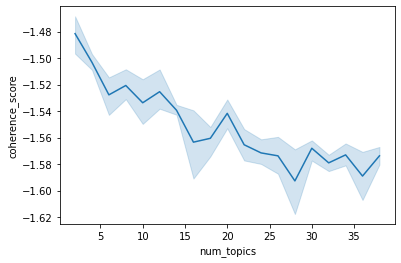

In [56]:
import seaborn as sns
ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

In [59]:
%%time 
# Replotting with 7 Topics

lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=4,
                   num_topics = 7 # You can change this parameter
                  )

CPU times: user 1.05 s, sys: 1.14 s, total: 2.19 s
Wall time: 2.3 s


In [60]:
lda.print_topics()

[(0,
  '0.018*"\n\n" + 0.013*"good" + 0.012*"place" + 0.009*"food" + 0.009*"service" + 0.008*"great" + 0.008*"time" + 0.007*"order" + 0.007*"like" + 0.007*"\n"'),
 (1,
  '0.017*"\n\n" + 0.014*"good" + 0.012*"time" + 0.011*"come" + 0.010*"place" + 0.010*"great" + 0.009*"food" + 0.009*"like" + 0.008*"get" + 0.007*"order"'),
 (2,
  '0.019*"good" + 0.016*"\n\n" + 0.013*"great" + 0.011*"food" + 0.011*"place" + 0.009*"time" + 0.009*"service" + 0.008*"go" + 0.007*"come" + 0.007*"get"'),
 (3,
  '0.022*"\n\n" + 0.015*"good" + 0.011*"great" + 0.010*"place" + 0.009*"order" + 0.009*"come" + 0.008*"service" + 0.007*"time" + 0.007*"go" + 0.007*"\n"'),
 (4,
  '0.017*"\n\n" + 0.013*"place" + 0.010*"food" + 0.010*"time" + 0.009*"good" + 0.008*"come" + 0.008*"go" + 0.007*"great" + 0.007*"service" + 0.007*"try"'),
 (5,
  '0.018*"\n\n" + 0.017*"food" + 0.013*"good" + 0.011*"place" + 0.010*"service" + 0.010*"\n" + 0.010*"time" + 0.009*"like" + 0.009*"come" + 0.008*"order"'),
 (6,
  '0.019*"\n\n" + 0.013*"p

In [61]:
%%time
words = [re.findall('"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words]
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------


 good place food service

------ Topic 1 ------


 good time come place

------ Topic 2 ------
good 

 great food place

------ Topic 3 ------


 good great place order

------ Topic 4 ------


 place food time good

------ Topic 5 ------


 food good place service

------ Topic 6 ------


 place like good food

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.43 ms


In [63]:
%%time
pyLDAvis.gensim.prepare(lda,corpus,id2word)

CPU times: user 4.62 s, sys: 1.55 s, total: 6.17 s
Wall time: 7.02 s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.003265  0.001661       1        1  14.550595
1     -0.006355  0.000740       2        1  14.464196
2      0.002030 -0.004314       3        1  14.443556
0      0.002000  0.000585       4        1  14.220407
3     -0.001444 -0.004032       5        1  14.179950
6      0.000389  0.001575       6        1  14.126286
4      0.000115  0.003785       7        1  14.015009, topic_info=        Term         Freq        Total Category  logprob  loglift
136     food  4907.000000  4907.000000  Default  30.0000  30.0000
40      good  6305.000000  6305.000000  Default  29.0000  29.0000
192    great  4272.000000  4272.000000  Default  28.0000  28.0000
294       \n  3168.000000  3168.000000  Default  27.0000  27.0000
45   service  3719.000000  3719.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
75       get   299.633545  2873.964111   Topic7  -5.3913  -0.2958
36      wait   236.029160  1689.265991   Topic7  -5.6299  -0.0031
22      look   237.906036  1974.205566   Topic7  -5.6220  -0.1510
89      nice   218.694962  1804.540161   Topic7  -5.7062  -0.1453
334   little   208.107361  1421.830078   Topic7  -5.7558   0.0434

[622 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
294       1  0.218100        \n
294       2  0.089639        \n
294       3  0.131933        \n
294       4  0.149293        \n
294       5  0.143296        \n
...     ...       ...       ...
1591      3  0.214214  zucchini
1591      4  0.107107  zucchini
1591      5  0.142809  zucchini
1591      6  0.142809  zucchini
1591      7  0.142809  zucchini

[2807 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 3, 1, 4, 7, 5])

In [64]:
lda[corpus[0]]

[(0, 0.14274743),
 (1, 0.1947917),
 (2, 0.12447417),
 (3, 0.08274814),
 (4, 0.1848255),
 (5, 0.12670633),
 (6, 0.1437067)]

In [65]:
distro = [lda[d] for d in corpus]

In [66]:
%%time
def update(doc):
        d_dist = {k:0 for k in range(0,5)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 14.9 ms


In [67]:
doc_topics = pd.DataFrame.from_records(new_distro)
doc_topics.columns = topics
doc_topics.head()

,\n\n good place food service,\n\n good time come place,good \n\n great food place,\n\n good great place order,\n\n place food time good,\n\n food good place service,\n\n place like good food
0,0.112748,0.237697,0.176190,0.094464,0.185615,0.111763,0.081524
1,0.176819,0.217621,0.041865,0.136150,0.157930,0.196417,0.073197
2,0.110361,0.147255,0.136488,0.177422,0.120878,0.136379,0.171217
3,0.153957,0.157657,0.104885,0.181262,0.123820,0.190595,0.087824
4,0.139230,0.150682,0.173170,0.152631,0.128667,0.138882,0.116739


In [68]:
doc_topics['primary_topic'] = doc_topics.idxmax(axis=1)
doc_topics['primary_topic'].value_counts()

good \n\n great food place      1694
\n\n good time come place       1662
\n\n food good place service    1621
\n\n good great place order     1326
\n\n place like good food       1307
\n\n good place food service    1250
\n\n place food time good       1140
Name: primary_topic, dtype: int64

### Interpretation

Based on the results, it is safe to assume that the overall topic is restaurant. We can also conclude that for the most parts peaople enjoy going to this restaurant, and like their food and service. The accuracty of the topics could be improved with further text cleaning. For instance "\n\n" and other special characters could be removed. 


## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)